In [ ]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
style.use('ggplot')


In [ ]:
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2020, 9, 16)


In [ ]:
prices = web.DataReader('^NSEI', 'yahoo', start, end)['Close']
returns = prices.pct_change()


In [ ]:
last_price = prices[-1]


In [ ]:
#Number of Simulations
num_simulations = 1000
num_days = 989


In [ ]:
simulation_df = pd.DataFrame()


In [ ]:
for x in range(num_simulations):
    count = 0
    daily_vol = returns.std()
    
    price_series = []
    
    price = last_price * (1 + np.random.normal(0, daily_vol))
    price_series.append(price)
    
    for y in range(num_days):
        if count == 988:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_vol))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series


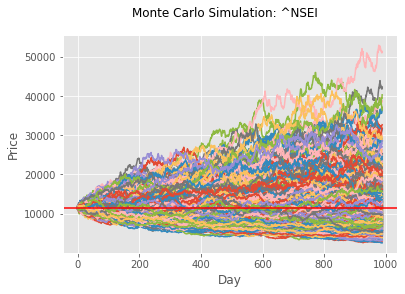

In [ ]:
fig = plt.figure()
fig.suptitle('Monte Carlo Simulation: ^NSEI')
plt.plot(simulation_df)
plt.axhline(y = last_price, color = 'r', linestyle = '-')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
